In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('E:/Masters/Courses/ISM-6251-DSP/Project1/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'categorical')

Found 148 images belonging to 4 classes.


In [6]:
valid_set = test_datagen.flow_from_directory('E:/Masters/Courses/ISM-6251-DSP/Project1/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 3, class_mode = 'categorical')

Found 32 images belonging to 4 classes.


In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 20,
                         epochs = 15,
                         
                         )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
20/20 [==============================] - 5s 249ms/step - loss: 1.4868 - accuracy: 0.2458
Epoch 2/15
20/20 [==============================] - 5s 252ms/step - loss: 1.3778 - accuracy: 0.2966
Epoch 3/15
20/20 [==============================] - 5s 259ms/step - loss: 1.4026 - accuracy: 0.2458
Epoch 4/15
20/20 [==============================] - 6s 294ms/step - loss: 1.3810 - accuracy: 0.3167
Epoch 5/15
20/20 [==============================] - 5s 271ms/step - loss: 1.3700 - accuracy: 0.3583
Epoch 6/15
20/20 [==============================] - 5s 271ms/step - loss: 1.3436 - accuracy: 0.3250
Epoch 7/15
20/20 [==============================] - 5s 274ms/step - loss: 1.2672 - accuracy: 0.2966
Epoch 8/15
20/20 [==============================] - 5s 275ms/step - loss: 1.1436 - accuracy: 0.4417
Epoch 9/15
20/20 [==============================] - 5s 262ms/step - loss: 1.1243 - accuracy: 0.5424
Epoch 10/15
20/20 [=====

# Checking with sample images

# 1

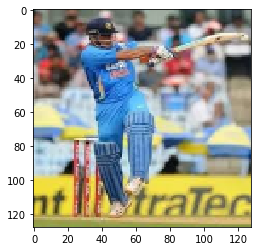

In [8]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('dhpull.jpg')
img_resize = cv2.resize(img, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img)

In [9]:
label_map = (training_set.class_indices)

label_map

{'Cover_Drive': 0, 'Pull_Shot': 1, 'Sweep_Shot': 2, 'Upper_Cut': 3}

In [10]:
img_rank4 = np.expand_dims(rgb_img/255, axis=0)

classifier.predict(img_rank4)

array([[0.03487507, 0.9993681 , 0.7527564 , 0.6851307 ]], dtype=float32)

In [11]:
list(label_map.keys())[classifier.predict_classes(img_rank4)[0]]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'Pull_Shot'

# 2

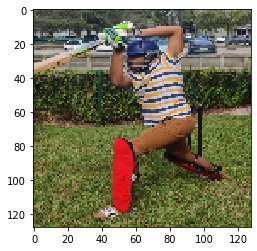

In [12]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('check1.jpg')
img_resize = cv2.resize(img, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize)       # get b,g,r
rgb_img2 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img2)

In [13]:
img_rank2 = np.expand_dims(rgb_img2/255, axis=0)

classifier.predict(img_rank2)

array([[5.1547027e-01, 1.5325606e-02, 4.4274330e-04, 4.8658252e-03]],
      dtype=float32)

In [14]:
list(label_map.keys())[classifier.predict_classes(img_rank2)[0]]

'Cover_Drive'

# 3

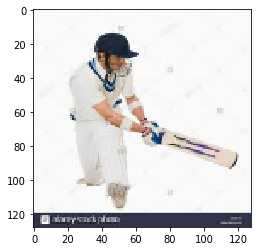

In [15]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('kkk.jpg')
img_resize = cv2.resize(img, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize)       # get b,g,r
rgb_img3 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img3)

In [16]:
img_rank3 = np.expand_dims(rgb_img3/255, axis=0)

classifier.predict(img_rank3)

array([[0.39513516, 0.61958563, 0.91952336, 0.08279735]], dtype=float32)

In [17]:
list(label_map.keys())[classifier.predict_classes(img_rank3)[0]]

'Sweep_Shot'

# 4

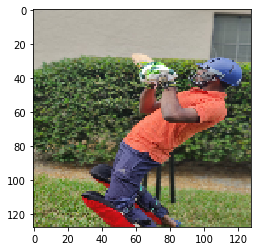

In [18]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('up.jpg')
img_resize = cv2.resize(img, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize)       # get b,g,r
rgb_img1 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img1)

In [19]:
img_rank1 = np.expand_dims(rgb_img1/255, axis=0)

classifier.predict(img_rank1)

array([[4.4317842e-03, 2.2501880e-01, 3.5881996e-04, 9.2983681e-01]],
      dtype=float32)

In [20]:
list(label_map.keys())[classifier.predict_classes(img_rank1)[0]]

'Upper_Cut'

# 5

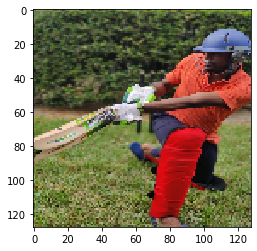

In [21]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img5 = cv2.imread('sweep.jpg')
img_resize5 = cv2.resize(img5, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize5)       # get b,g,r
rgb_img5 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img5)

In [22]:
img_rank5 = np.expand_dims(rgb_img5/255, axis=0)

classifier.predict(img_rank5)

array([[1.7327070e-03, 4.8961163e-02, 9.8490894e-01, 2.4192509e-06]],
      dtype=float32)

In [23]:
list(label_map.keys())[classifier.predict_classes(img_rank5)[0]]

'Sweep_Shot'

# 6

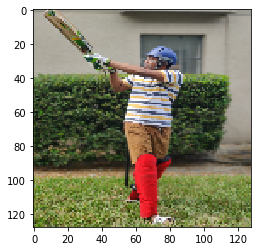

In [24]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img6 = cv2.imread('pull.jpg')
img_resize6 = cv2.resize(img6, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize6)       # get b,g,r
rgb_img6 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img6)

In [25]:
img_rank6 = np.expand_dims(rgb_img6/255, axis=0)

classifier.predict(img_rank6)

array([[9.8623633e-03, 7.1202368e-01, 2.6399543e-05, 3.6092508e-01]],
      dtype=float32)

In [26]:
list(label_map.keys())[classifier.predict_classes(img_rank6)[0]]

'Pull_Shot'